In [ ]:
# Pymaceuticals Inc.
---

### Analysis

- Pymaceuticals Inc. ran tests of 249 mice to see how various drug regimens helped in reducing squamous cell carcinoma (SCC) tumors.
- The tests involved putting mice on drug regimens and recording tumor volume at various timepoints, from 0 to 45 days.
- The purpose of the study was to see how Pymacheuticals Inc.'s drug Capomulin compared against similar drug treatments.
- We found that Capomulin showed significant signs of success. Compared to other drugs, mice who were treated with Capomulin showed the second-lowest tumor volume. The drug Ramicane performed slightly better, with lower scores for tumor volume mean, median, variance, standard deviation, and standard error. However, the difference between the two drugs were very small. The results are promising and show that Capomulin could be a viable competitor to Ramicane.
- Both Capomulin and Ramicane had almost identical timepoint recordings, making the comparison between the two drugs more accurate.
- The use of Capomulin seemed to have no effect on (or, possibly but perhaps unlikely, increase) tumor volume until 20 days. After 20 days of taking the drug, the mice's tumor volume decreased significantly over the next 15 days. After 35 days, average tumor volume reached its lowest volume, roughly 7 points lower than the maximum point at 20 days. However, after 35 days, tumor volume began increasing again. It is currently unclear if this is because Capomulin's effectiveness wears off or it is due to some other factor. Further testing is needed.
- The mouse population was almost evenly split between male and female mice. There were slightly more male mice (51% to 49%). A test with a perfectly even split is recommended before moving to human trials.
- Results of the test for Capomulin showed no outliers, showing the drug seems to be stable and the population would respond predictably. However, this is true for the small sample size and further analysis of the mice would be necessary to show if the population was truly diverse.
- There is a strong correlation between a mouse's weight and its tumor volume, with heavier mice having tumors with greater volume (and lighter mice with lower tumor volumes). However, without the weight and tumor size of before the trials, it is unclear what effect Capomulin may have had. Though it is safe to say that the changes in tumors among the mice were consistent based on the mouse's weight; that is, tumor volume seems to have increased or decreased evenly across the population. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
pd.DataFrame(mouse_study_df)
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# I found the duplicated function in the Pandas documentation
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = duplicate_mice.reset_index().loc[0, "Mouse ID"]
duplicate_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == duplicate_mouse, :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != duplicate_mouse]
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(mouse_study_df["Mouse ID"].unique())
unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                 "Median Tumor Volume" : tumor_median,
                 "Tumor Volume Variance" : tumor_variance,
                 "Tumor Volume Std. Dev." : tumor_std,
                 "Tumor Volume Std. Err." : tumor_sem}, index = mouse_study_df["Drug Regimen"].unique()
                            ).sort_index()
tumor_summary.index.name = "Drug Regimen"
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

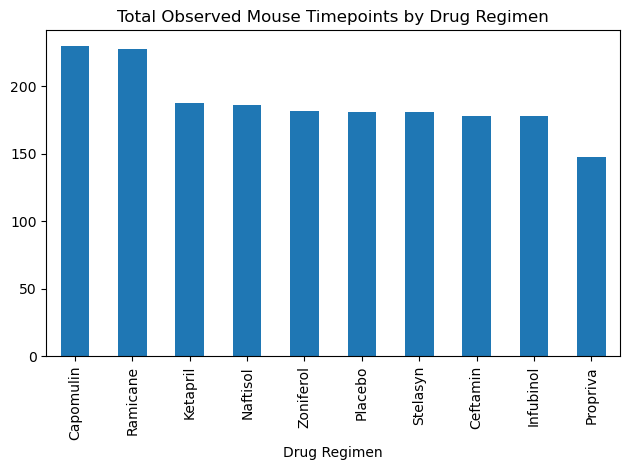

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_study_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False).plot(kind="bar")

# Set a title for the chart
plt.title("Total Observed Mouse Timepoints by Drug Regimen")
plt.tight_layout()
plt.show()

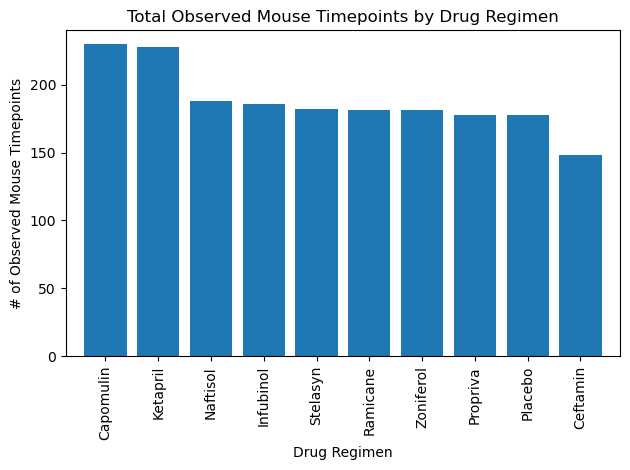

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
height = mouse_study_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)
x_axis = np.arange(len(mouse_study_df["Drug Regimen"].unique()))
plt.bar(x_axis, height, linewidth = 5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_study_df["Drug Regimen"].unique(), rotation = "vertical")
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25) # this “starts” the bars by adding a little white space before and after the first and last bars)
plt.ylim(0, max(height)+10)
plt.title("Total Observed Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

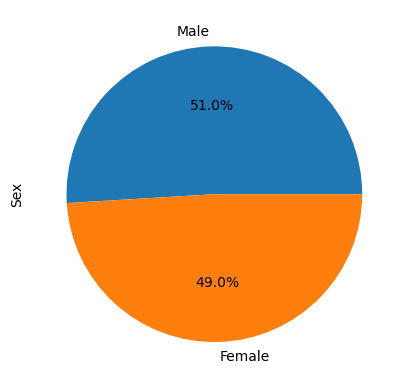

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pie = mouse_study_df["Sex"].value_counts().plot(kind="pie", ylabel = "Sex", autopct="%1.1f%%")
plt.show()

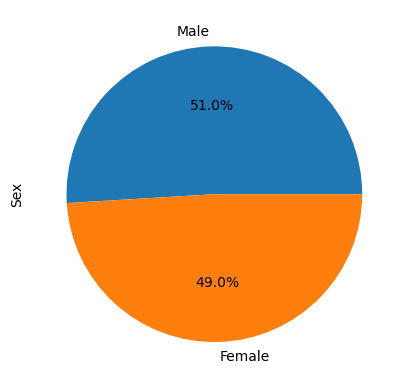

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_df["Sex"].value_counts(), autopct="%1.1f%%", labels = mouse_study_df["Sex"].value_counts().keys())
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = mouse_study_df.groupby(["Mouse ID"])["Timepoint"].max()
mouse_max_timepoint = mouse_max_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = mouse_max_timepoint.merge(mouse_study_df, how = "left", on = ["Mouse ID", "Timepoint"])
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
final_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_fdr = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Xpert Learning Assistant helped me with this nested for loop

for drug in final_drug_regimens:
    tumor_vol_data = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_data_fdr.append(tumor_vol_data)
    quartiles_data = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lower_quart = quartiles_data[0.25]
    upper_quart = quartiles_data[0.75]
    iqr = upper_quart - lower_quart
    lower_bound = lower_quart - (1.5*iqr)
    upper_bound = upper_quart + (1.5*iqr)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    print(f"{drug} outliers are: {outliers}")


Capomulin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


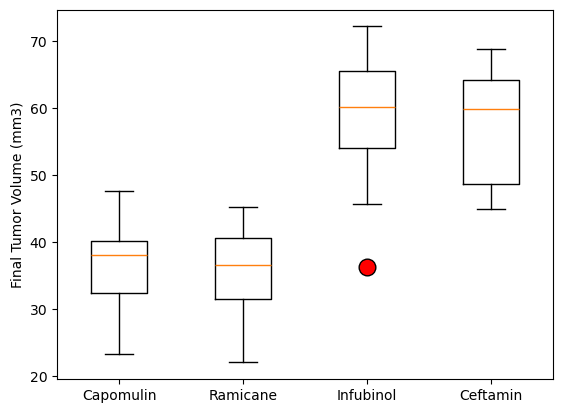

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_fdr, labels = final_drug_regimens, flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

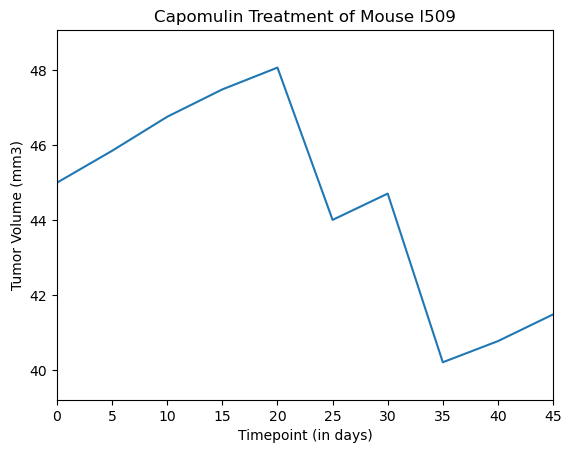

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_line = mouse_study_df[mouse_study_df["Mouse ID"] == "l509"][["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(mouse_line["Timepoint"], mouse_line["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (in days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.ylim(mouse_line["Tumor Volume (mm3)"].min() - 1, mouse_line["Tumor Volume (mm3)"].max() + 1)
plt.show()

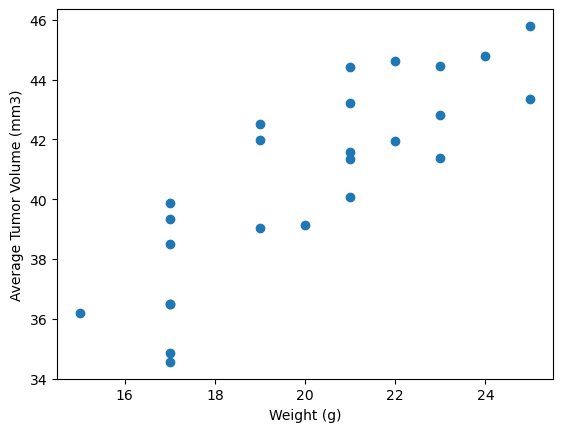

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_scatter = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]

mouse_avg_tumor = mouse_scatter.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_avg_weight = mouse_scatter.groupby("Mouse ID")["Weight (g)"].mean()

x_values = mouse_avg_weight
y_values = mouse_avg_tumor
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


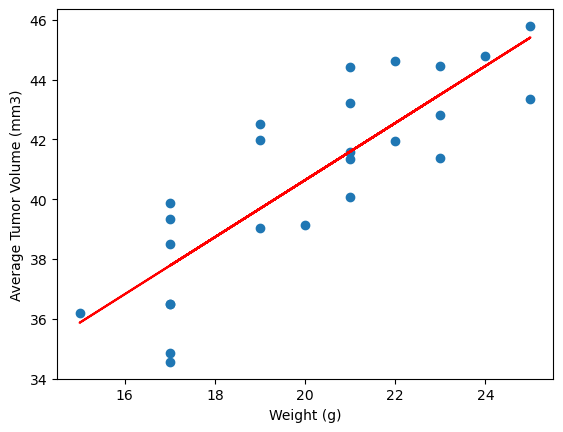

In [88]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = mouse_avg_weight
y_values = mouse_avg_tumor
correlation = st.pearsonr(mouse_avg_weight, mouse_avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()